In [43]:
import pandas as pd
import numpy as np
import datetime
from statsmodels.tsa.stattools import kpss

In [2]:
data=pd.read_csv("C:/Users/abhin/TS Lab/Datasets/shampoo_sales.csv")

In [14]:
def date_parser(x):
    temp=x.split("-")
    year=temp[0]
    month=temp[1]
    year="200"+year
    if(month[0]=="0"):
        month=month[1]
    return datetime.datetime(int(year),int(month),1)

In [21]:
data.set_index("Month")

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3
2001-06-01,168.5
2001-07-01,231.8
2001-08-01,224.5
2001-09-01,192.8


In [24]:
data["Month"]=pd.to_datetime(data["Month"])

In [29]:
data.set_index("Month",inplace=True)

In [31]:
upsampled_data=data.resample("D").asfreq()

In [34]:
interpolated=upsampled_data.interpolate(method="linear")

<Axes: xlabel='Month'>

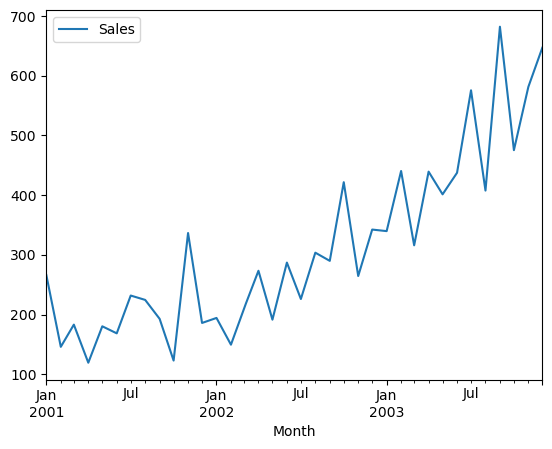

In [36]:
interpolated.plot()

In [45]:
def kpss_test(series):
    statistic,p,lags,critical = kpss(series)
    print("Statistic :",statistic)
    print("P-Value :",p)
    print("lags :",lags)
    print("Critical Values",critical)
kpss_test(data)

Statistic : 0.7527760620404709
P-Value : 0.01
lags : 4
Critical Values {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


D:\PYTHON\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [48]:
decomposition=seasonal_decompose(data,model='additive',period=12)
trend=decomposition.trend
seasonal=decomposition.seasonal

<Axes: xlabel='Month'>

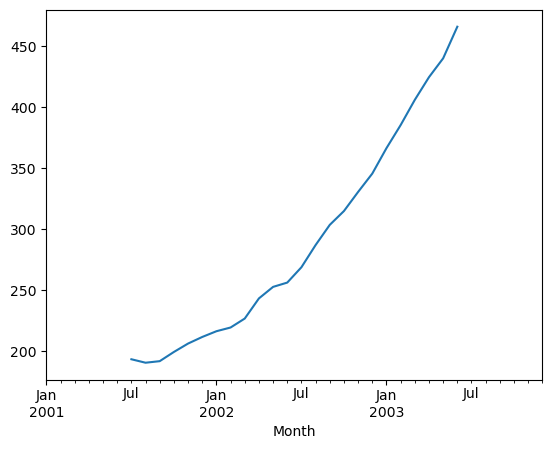

In [49]:
trend.plot()

<Axes: xlabel='Month'>

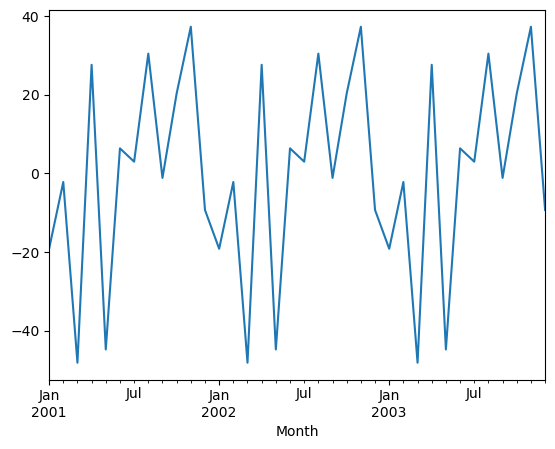

In [50]:
seasonal.plot()

In [52]:
residual = decomposition.resid

<Axes: xlabel='Month'>

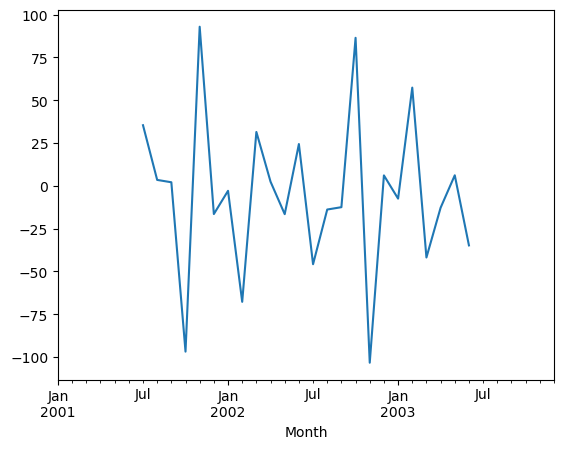

In [53]:
residual.plot()